In [1]:
def benchmark():
    # Original Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
    
    #from __future__ import print_function
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    from keras import backend as K
    import time

    batch_size = 128
    num_classes = 10
    epochs = 12

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    # time only the CNN portion
    start = time.time()

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    # verbosity is silent
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_split=.8)
    score = model.evaluate(x_test, y_test, verbose=0) 
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    end = time.time() - start
    print(f'Time to run CNN Model is {end:.2f} seconds')

    K.clear_session()
    del model
    return end

In [2]:
# CPU @ 4.3GHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())

run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('4_3.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.053400537303850436
Test accuracy: 0.9821
Time to run CNN Model is 28.19 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05836656783845319
Test accuracy: 0.9827
Time to run CNN Model is 26.98 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.06148444327189645
Test accuracy: 0.9814
Time to run CNN Model is 27.11 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.054497890518247
Test accuracy: 0.9842
Time to run CNN Model is 27.04 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0577565360223678
Test accuracy: 0.9814
Time to run CNN Model is 26.92 seconds


In [3]:
print(run_times)
print(mean_std)

[26.982845783233643, 27.110504627227783, 27.043683290481567]
[27.04567790031433, 0.052135585823688615]


In [4]:
pickle_in = open('4_3.pickle', 'rb')
x = pickle.load(pickle_in)
x

[27.04567790031433, 0.052135585823688615]

### Reboot

In [4]:
# CPU @ 4.4GHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())

run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('4_4.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.053635211850913765
Test accuracy: 0.9829
Time to run CNN Model is 26.93 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05056731430435611
Test accuracy: 0.984
Time to run CNN Model is 26.93 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05562475226189781
Test accuracy: 0.9816
Time to run CNN Model is 27.16 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05473585452490661
Test accuracy: 0.9825
Time to run CNN Model is 27.02 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.055541092719852164
Test accuracy: 0.982
Time to run CNN Model is 26.80 seconds


### Reboot

In [2]:
# CPU @ 4.5GHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('4_5.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.055680771916056256
Test accuracy: 0.9839
Time to run CNN Model is 29.54 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.046377268916001774
Test accuracy: 0.9853
Time to run CNN Model is 26.94 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.04831559362689514
Test accuracy: 0.9843
Time to run CNN Model is 26.75 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05296562201416382
Test accuracy: 0.9838
Time to run CNN Model is 26.84 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05278798677196319
Test accuracy: 0.9833
Time to run CNN Model is 26.71 seconds


### Reboot

In [2]:
# CPU @ 4.6GHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('4_6.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05620456033280425
Test accuracy: 0.983
Time to run CNN Model is 29.47 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05264035290092361
Test accuracy: 0.9829
Time to run CNN Model is 26.79 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05846237947738628
Test accuracy: 0.9828
Time to run CNN Model is 26.82 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05907110010482283
Test accuracy: 0.9815
Time to run CNN Model is 26.84 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05493434870053607
Test accuracy: 0.9834
Time to run CNN Model is 26.69 seconds


### Reboot

In [2]:
# CPU @ 4.7GHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('4_7.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.06364646030259974
Test accuracy: 0.9809
Time to run CNN Model is 29.00 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05787872535011629
Test accuracy: 0.9821
Time to run CNN Model is 26.54 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05536574770122898
Test accuracy: 0.9813
Time to run CNN Model is 26.42 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.04874470998833858
Test accuracy: 0.9847
Time to run CNN Model is 26.52 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.053678476036601204
Test accuracy: 0.9833
Time to run CNN Model is 26.43 seconds


### Reboot

In [2]:
# CPU @ 4.8GHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('4_8.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.052152342032919116
Test accuracy: 0.9848
Time to run CNN Model is 29.02 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05358453416488192
Test accuracy: 0.984
Time to run CNN Model is 26.62 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05680403278491176
Test accuracy: 0.9829
Time to run CNN Model is 26.53 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05883248362448212
Test accuracy: 0.9823
Time to run CNN Model is 26.52 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05882808388454723
Test accuracy: 0.9823
Time to run CNN Model is 26.45 seconds


# GPU Core Tuning

In [2]:
# CPU @ 4.8GHz
# GPU Core Clock @ -400MHz
# GPU Memory Clock @ default
# Configuration 1
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('core1.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.051236002481487956
Test accuracy: 0.9844
Time to run CNN Model is 30.12 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.06151448681503825
Test accuracy: 0.9802
Time to run CNN Model is 29.26 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05758913816533023
Test accuracy: 0.9822
Time to run CNN Model is 29.21 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05768341180729767
Test accuracy: 0.9826
Time to run CNN Model is 29.00 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05354408614825952
Test accuracy: 0.9823
Time to run CNN Model is 28.81 seconds


In [3]:
# CPU @ 4.8GHz
# GPU Core Clock @ -300MHz
# GPU Memory Clock @ default
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('core2.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05967214046240697
Test accuracy: 0.9813
Time to run CNN Model is 28.51 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0535924849349045
Test accuracy: 0.984
Time to run CNN Model is 28.36 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05489088245493549
Test accuracy: 0.982
Time to run CNN Model is 28.56 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0543412395665262
Test accuracy: 0.982
Time to run CNN Model is 28.27 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05278181997588399
Test accuracy: 0.9843
Time to run CNN Model is 28.04 seconds


In [4]:
# CPU @ 4.8GHz
# GPU Core Clock @ -200MHz
# GPU Memory Clock @ default
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('core3.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05073814148812671
Test accuracy: 0.9842
Time to run CNN Model is 27.89 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05612485152716436
Test accuracy: 0.9837
Time to run CNN Model is 27.50 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05730590325458397
Test accuracy: 0.9828
Time to run CNN Model is 27.57 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05380922624329833
Test accuracy: 0.9828
Time to run CNN Model is 27.54 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05670178394711111
Test accuracy: 0.9827
Time to run CNN Model is 27.86 seconds


In [5]:
# CPU @ 4.8GHz
# GPU Core Clock @ -100MHz
# GPU Memory Clock @ default
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('core4.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05133793380494608
Test accuracy: 0.9841
Time to run CNN Model is 27.26 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05669688641002358
Test accuracy: 0.9834
Time to run CNN Model is 26.91 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05746517371977461
Test accuracy: 0.9815
Time to run CNN Model is 27.03 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.049158915351530594
Test accuracy: 0.9831
Time to run CNN Model is 26.92 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05511242086732964
Test accuracy: 0.9821
Time to run CNN Model is 27.35 seconds


In [6]:
# CPU @ 4.8GHz
# GPU Core Clock @ +0MHz
# GPU Memory Clock @ default
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('core5.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0503418024363491
Test accuracy: 0.9836
Time to run CNN Model is 26.74 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05970190847572776
Test accuracy: 0.982
Time to run CNN Model is 26.56 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.055258573813039405
Test accuracy: 0.9837
Time to run CNN Model is 26.37 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05323745930365403
Test accuracy: 0.9825
Time to run CNN Model is 26.57 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.054964974609460475
Test accuracy: 0.9827
Time to run CNN Model is 26.41 seconds


In [7]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ default
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('core6.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.060121904104884744
Test accuracy: 0.9825
Time to run CNN Model is 26.14 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.06061242164765645
Test accuracy: 0.9815
Time to run CNN Model is 26.06 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0538625692882637
Test accuracy: 0.9834
Time to run CNN Model is 26.26 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.052652691310894444
Test accuracy: 0.984
Time to run CNN Model is 29.60 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.050200182070137815
Test accuracy: 0.9842
Time to run CNN Model is 26.23 seconds


# GPU Memory Tuning

In [9]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ -300MHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('mem1.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05668058544809028
Test accuracy: 0.983
Time to run CNN Model is 26.81 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05325943080986471
Test accuracy: 0.9829
Time to run CNN Model is 26.44 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05519827129988989
Test accuracy: 0.9829
Time to run CNN Model is 26.42 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.057551643640978
Test accuracy: 0.9826
Time to run CNN Model is 26.53 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05183903165015145
Test accuracy: 0.9839
Time to run CNN Model is 26.67 seconds


In [10]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ -200MHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('mem2.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05606942728260765
Test accuracy: 0.9826
Time to run CNN Model is 26.39 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05973393319943571
Test accuracy: 0.9827
Time to run CNN Model is 26.11 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05301238645460071
Test accuracy: 0.984
Time to run CNN Model is 26.18 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05262512597766836
Test accuracy: 0.9831
Time to run CNN Model is 26.12 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05163945389264554
Test accuracy: 0.9833
Time to run CNN Model is 26.18 seconds


In [11]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ -100MHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('mem3.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05684559222803582
Test accuracy: 0.9822
Time to run CNN Model is 26.71 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05609466864888964
Test accuracy: 0.9822
Time to run CNN Model is 26.49 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05080288886159251
Test accuracy: 0.9835
Time to run CNN Model is 26.41 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.07030947876383797
Test accuracy: 0.9792
Time to run CNN Model is 26.50 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.056813963042534305
Test accuracy: 0.9819
Time to run CNN Model is 26.50 seconds


In [12]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ +0MHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('mem4.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05269586612261482
Test accuracy: 0.9824
Time to run CNN Model is 26.50 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05268453376766847
Test accuracy: 0.9843
Time to run CNN Model is 26.38 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05185991496719216
Test accuracy: 0.9832
Time to run CNN Model is 26.25 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.057292410239668246
Test accuracy: 0.9837
Time to run CNN Model is 26.06 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0534203818603004
Test accuracy: 0.9832
Time to run CNN Model is 26.24 seconds


In [13]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ +100MHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('mem5.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.055239729657030695
Test accuracy: 0.9837
Time to run CNN Model is 26.14 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05308899590570363
Test accuracy: 0.9835
Time to run CNN Model is 25.93 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0565796636511368
Test accuracy: 0.981
Time to run CNN Model is 25.94 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05918674446986188
Test accuracy: 0.9817
Time to run CNN Model is 25.86 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.06011907200044916
Test accuracy: 0.9819
Time to run CNN Model is 25.80 seconds


In [14]:
# CPU @ 4.8GHz
# GPU Core Clock @ +100MHz
# GPU Memory Clock @ +200MHz
import numpy as np
import pickle

run_times = []
mean_std = []
for i in range(5):
    run_times.append(benchmark())
    
run_times.remove(max(run_times))
run_times.remove(min(run_times))
mean = np.mean(run_times)
std = np.std(run_times)
mean_std = [mean, std]

pickle_out = open('mem6.pickle', 'wb')
pickle.dump(mean_std, pickle_out)
pickle_out.close()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05542438473175862
Test accuracy: 0.9826
Time to run CNN Model is 25.96 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0571521359702514
Test accuracy: 0.9828
Time to run CNN Model is 25.53 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.05594449836297281
Test accuracy: 0.9833
Time to run CNN Model is 25.65 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.051481654992076804
Test accuracy: 0.9835
Time to run CNN Model is 25.89 seconds
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.054187199428478196
Test accuracy: 0.9837
Time to run CNN Model is 25.63 seconds


# Analysis & Charts

In [61]:
# re-load saved data
CPU_runtimes = []
CPU_params = [4.3, 4.4, 4.5, 4.6, 4.7, 4.8]
CPU_runtimes.append(pickle.load(open('4_3.pickle', 'rb'))[0])
CPU_runtimes.append(pickle.load(open('4_4.pickle', 'rb'))[0])
CPU_runtimes.append(pickle.load(open('4_5.pickle', 'rb'))[0])
CPU_runtimes.append(pickle.load(open('4_6.pickle', 'rb'))[0])
CPU_runtimes.append(pickle.load(open('4_7.pickle', 'rb'))[0])
CPU_runtimes.append(pickle.load(open('4_8.pickle', 'rb'))[0])

GPU_core_runtimes = []
GPU_core_params =[1500, 1600, 1700, 1800, 1900, 2000]
GPU_core_runtimes.append(pickle.load(open('core1.pickle', 'rb'))[0])
GPU_core_runtimes.append(pickle.load(open('core2.pickle', 'rb'))[0])
GPU_core_runtimes.append(pickle.load(open('core3.pickle', 'rb'))[0])
GPU_core_runtimes.append(pickle.load(open('core4.pickle', 'rb'))[0])
GPU_core_runtimes.append(pickle.load(open('core5.pickle', 'rb'))[0])
GPU_core_runtimes.append(pickle.load(open('core6.pickle', 'rb'))[0])

GPU_mem_runtimes = []
GPU_mem_params =[3500, 3600, 3700, 3800, 3900, 4000]
GPU_mem_runtimes.append(pickle.load(open('mem1.pickle', 'rb'))[0])
GPU_mem_runtimes.append(pickle.load(open('mem2.pickle', 'rb'))[0])
GPU_mem_runtimes.append(pickle.load(open('mem3.pickle', 'rb'))[0])
GPU_mem_runtimes.append(pickle.load(open('mem4.pickle', 'rb'))[0])
GPU_mem_runtimes.append(pickle.load(open('mem5.pickle', 'rb'))[0])
GPU_mem_runtimes.append(pickle.load(open('mem6.pickle', 'rb'))[0])

# CPU performance improvement over baseline
print(f'CNN training performance improvement from 4.3GHz to 4.8GHz is {(CPU_runtimes[0]/CPU_runtimes[5]-1)*100:.2f}%')
 
# GPU performance improvement over baseline
print(f'CNN training performance improvement from 1,900MHz to 2,000MHz is {(GPU_core_runtimes[4]/GPU_core_runtimes[5]-1)*100:.2f}%')

# GPU performance improvement over baseline
print(f'CNN training performance improvement from 3,800MHz to 4,000MHz is {(GPU_mem_runtimes[3]/GPU_mem_runtimes[5]-1)*100:.2f}%')

# Cumulative performance improvement of overclocking CPU & GPU core/memory
print(f'Cumulative CNN training performance improvement is {(CPU_runtimes[0]/GPU_mem_runtimes[5]-1)*100:.2f}%')

# normalize values
CPU_runtimes = CPU_runtimes/max(CPU_runtimes)
GPU_core_runtimes = GPU_core_runtimes/max(GPU_core_runtimes)
GPU_mem_runtimes = GPU_mem_runtimes/max(GPU_mem_runtimes)

CNN training performance improvement from 4.3GHz to 4.8GHz is 1.85%
CNN training performance improvement from 1,900MHz to 2,000MHz is 1.16%
CNN training performance improvement from 3,800MHz to 4,000MHz is 2.21%
Cumulative CNN training performance improvement is 5.15%


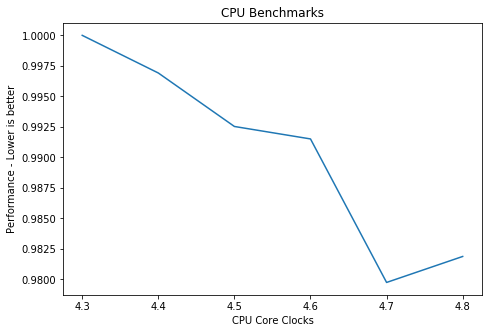

In [41]:
# Chart values
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5,5))
plt.plot(CPU_params, CPU_runtimes)
plt.xlabel('CPU Core Clocks')
plt.ylabel('Performance - Lower is better')
plt.title('CPU Benchmarks')
plt.savefig('CPU Benchmarks')
plt.show()

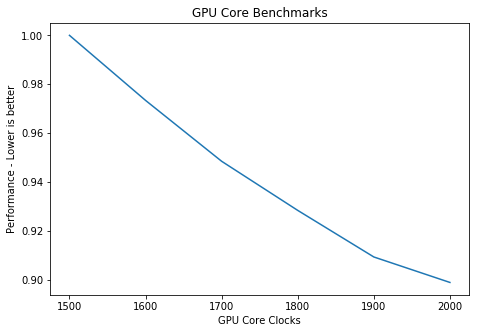

In [42]:
plt.figure(figsize=(7.5,5))
plt.plot(GPU_core_params, GPU_core_runtimes)
plt.xlabel('GPU Core Clocks')
plt.ylabel('Performance - Lower is better')
plt.title('GPU Core Benchmarks')
plt.savefig('GPU Core Benchmarks.png')
plt.show()

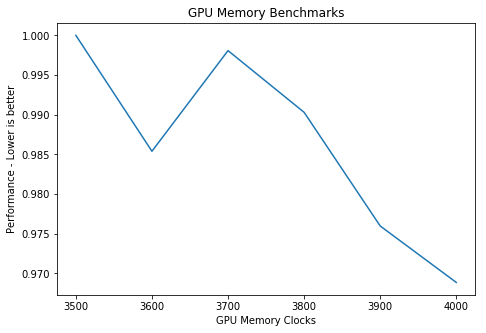

In [43]:
plt.figure(figsize=(7.5,5))
plt.plot(GPU_mem_params, GPU_mem_runtimes)
plt.xlabel('GPU Memory Clocks')
plt.ylabel('Performance - Lower is better')
plt.title('GPU Memory Benchmarks')
plt.savefig('GPU Memory Benchmarks.png')
plt.show()